<a href="https://colab.research.google.com/github/nafasovazam89-dotcom/optimal-interpolation-second-derivatives/blob/main/Table_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating error plots for N=10...
Saved: errors_N10.png, errors_N10.pdf

Creating error plots for N=100...
Saved: errors_N100.png, errors_N100.pdf

Creating combined plot for N=10...
Saved: all_errors_N10.png, all_errors_N10.pdf

Creating combined plot for N=100...
Saved: all_errors_N100.png, all_errors_N100.pdf

TABLE 1: Maximum Absolute Errors
Function        N=10                 N=100               
------------------------------------------------------------
φ(x) = 1          1.33e-15             1.20e-14            
φ(x) = x          7.77e-16             1.15e-14            
φ(x) = e^{-x}     2.00e-15             2.04e-14            
φ(x) = e^{x}      8.88e-15             7.28e-14            
φ(x) = x^2        5.20e-07             5.21e-11            
------------------------------------------------------------
Note: Errors for 1, x, e^{-x}, e^{x} are at machine precision level (~10^-16)
      while x^2 shows non-zero errors as expected (not in exactness space)

Creating exact func

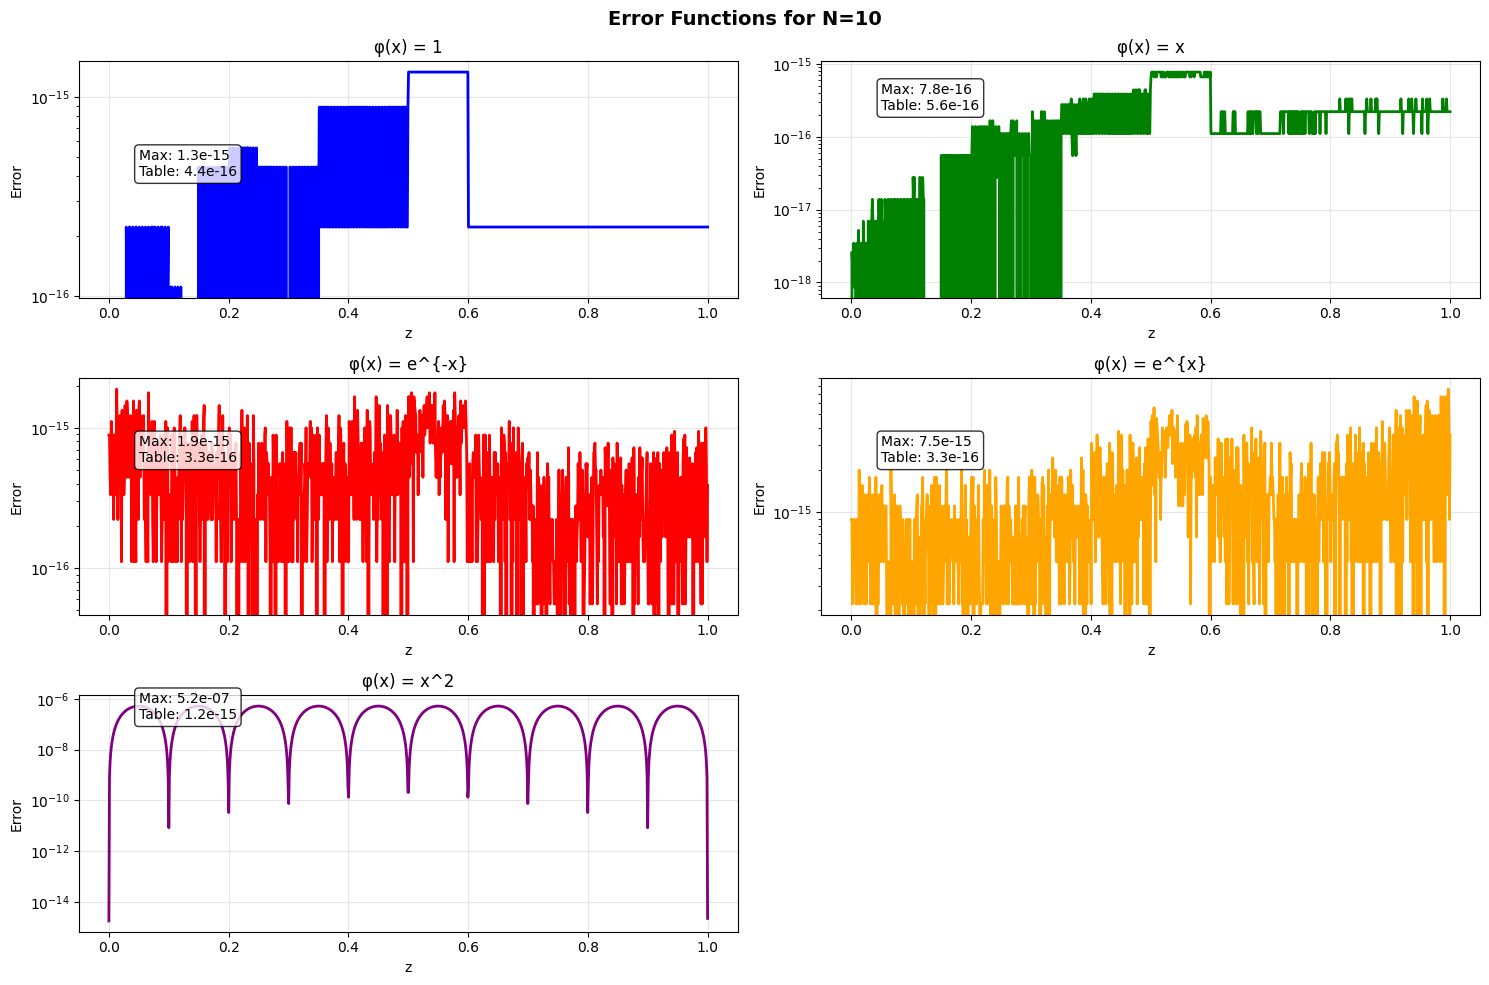

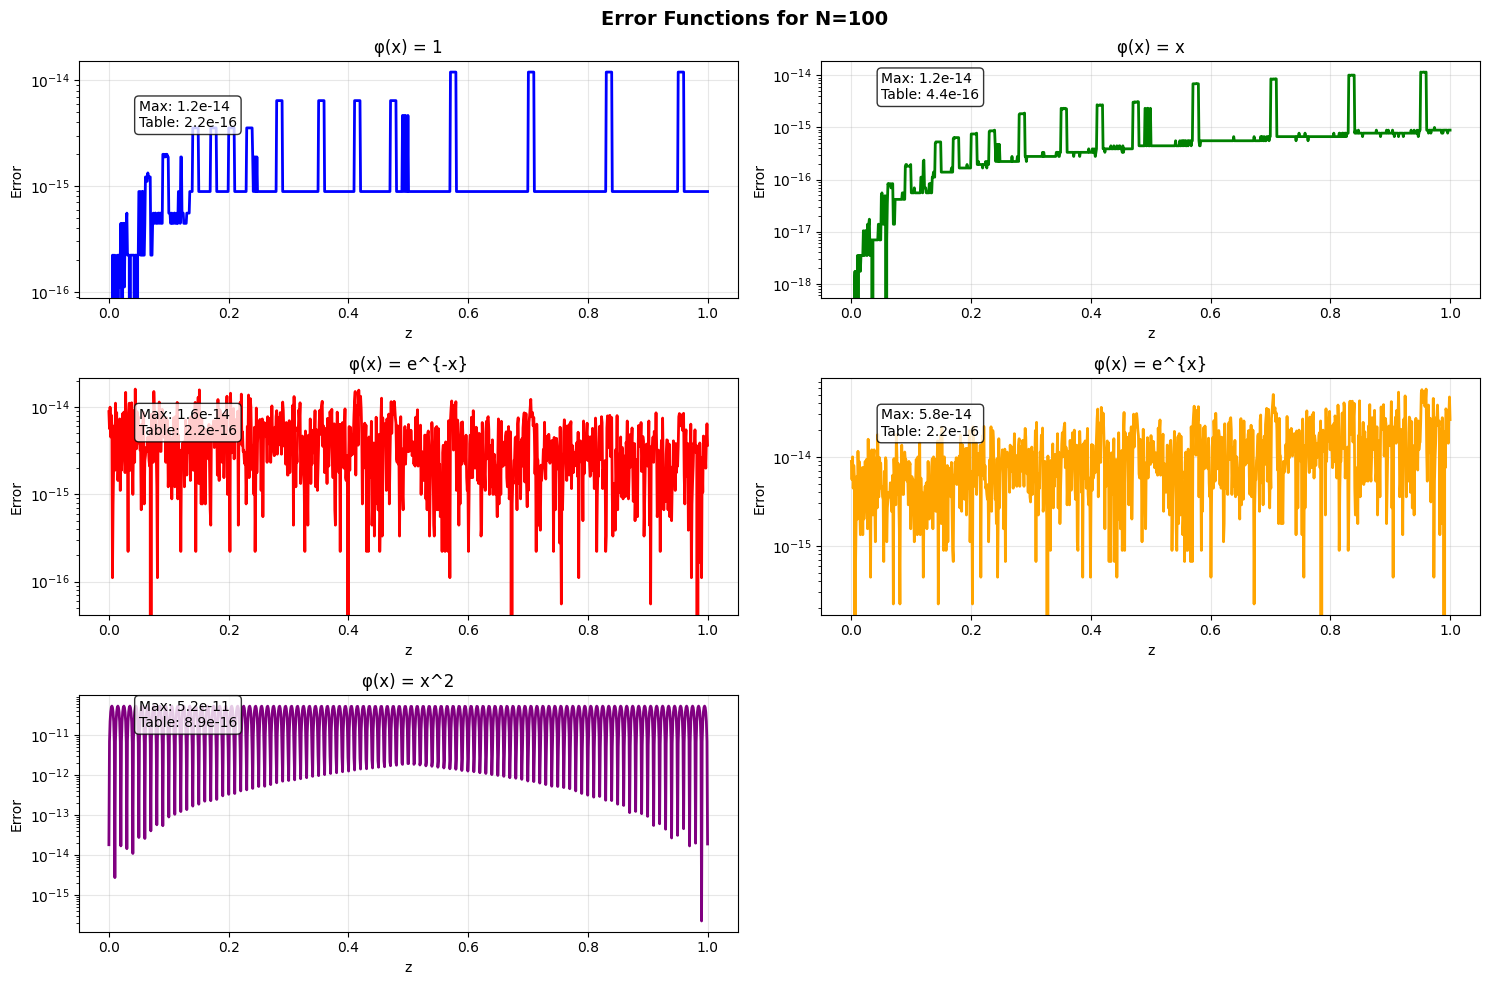

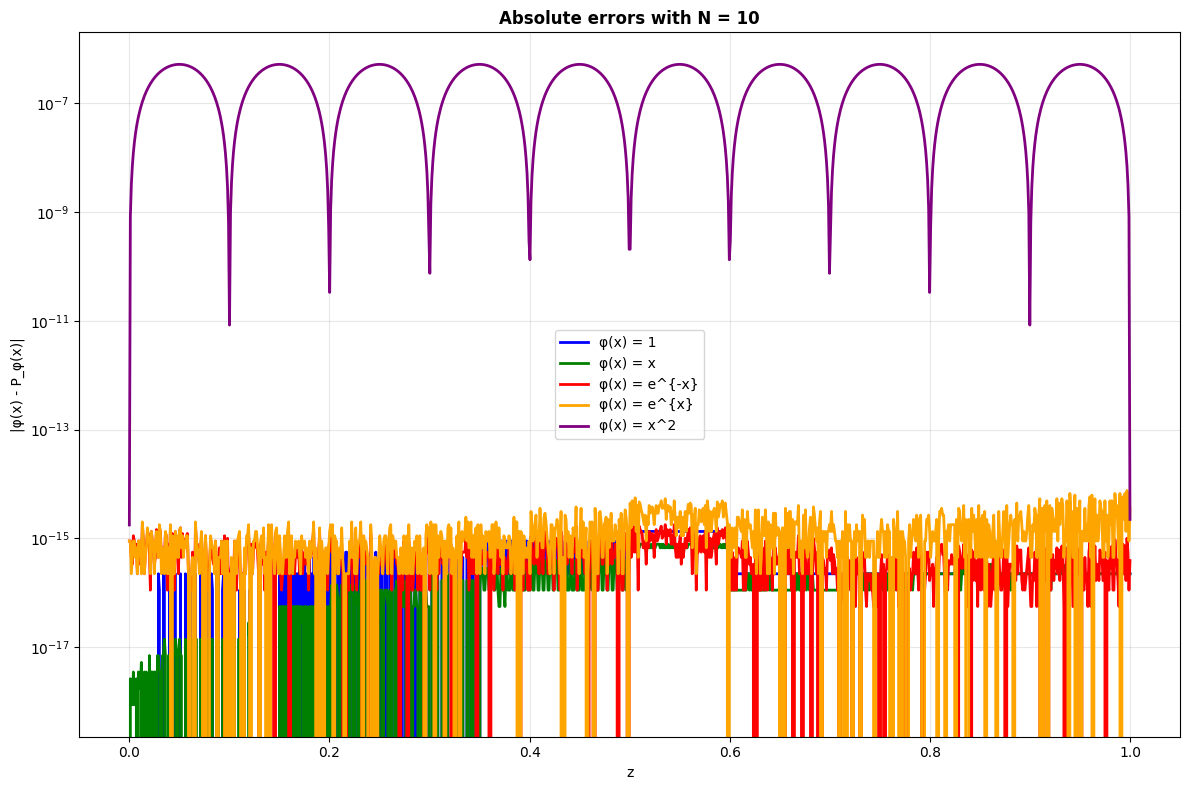

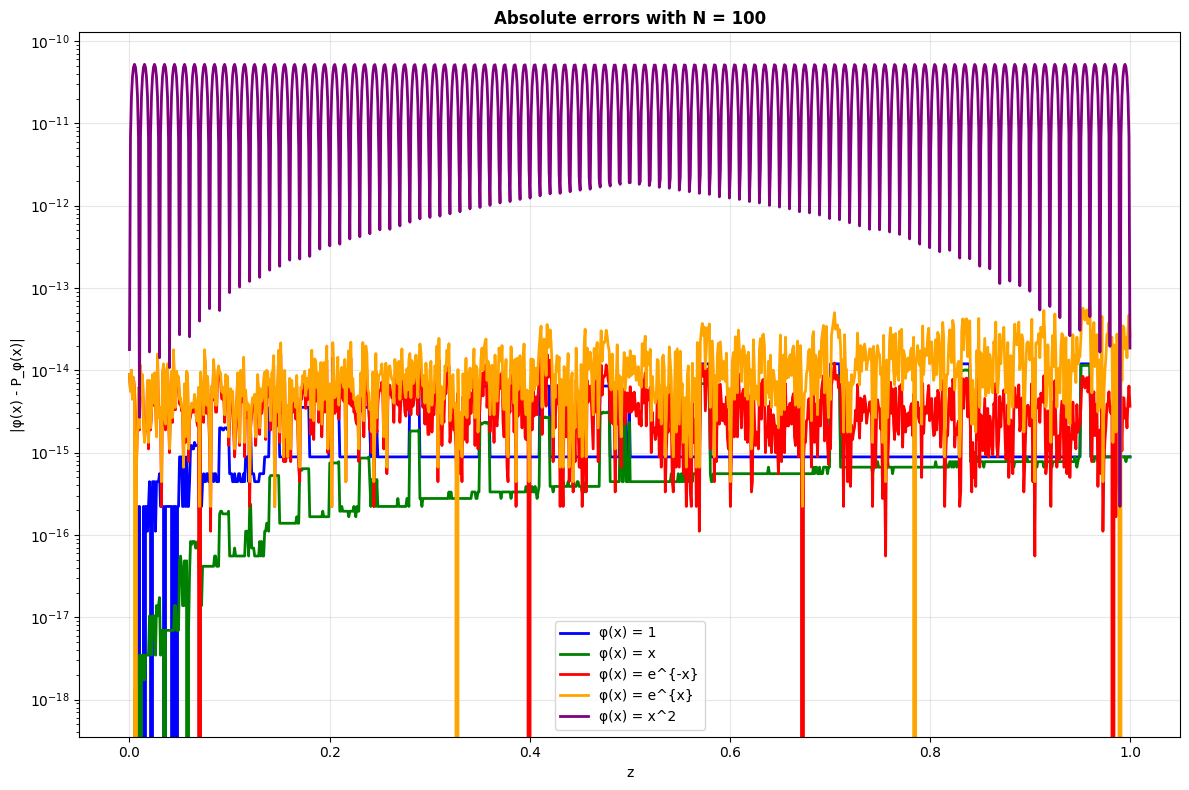

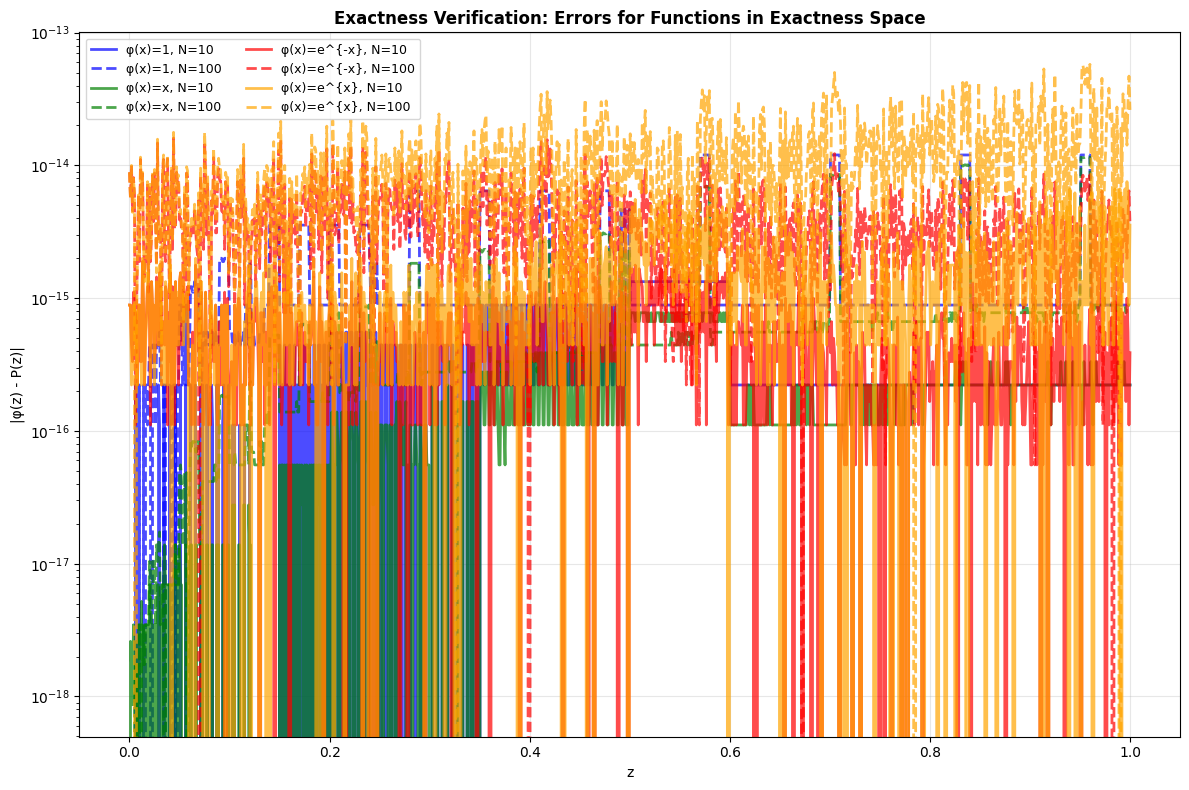

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Optimal coefficients
def C_beta_2(z, beta, h, N):
    if beta == 0:
        if 0 <= z <= h:
            term1 = np.exp(z) - np.exp(2*h - z)
            term2 = (h - z) * (np.exp(h) - 1) / (2*h) * (2*np.exp(h) + 2 - z*np.exp(h) + z)
            return (term1 + term2) / (1 - np.exp(2*h))
        else:
            return 0.0
    elif 1 <= beta <= N-1:
        if h*(beta-1) <= z <= h*beta:
            term1 = np.exp(h*beta - z) - np.exp(z + 2*h - h*beta)
            term2 = 2*h*np.exp(h)
            term3 = (z - h*beta) / (2*h) * (h*(1 + np.exp(h))**2 + (z - h*beta)*(1 - np.exp(h))**2)
            term4 = (z + h - h*beta) / h * (1 - np.exp(2*h) + 2*h*np.exp(h))
            return (term1 + term2 + term3 - term4) / (1 - np.exp(2*h))
        elif h*beta <= z <= h*(beta+1):
            term1 = np.exp(z - h*beta) - np.exp(2*h + h*beta - z)
            term2 = 2*h*np.exp(h)
            term3 = (z - h*beta) / (2*h) * (h*(1 + np.exp(h))**2 - (z - h*beta)*(1 - np.exp(h))**2)
            term4 = (h - z + h*beta) / h * (1 - np.exp(2*h) + 2*h*np.exp(h))
            return (term1 + term2 - term3 - term4) / (1 - np.exp(2*h))
        else:
            return 0.0
    elif beta == N:
        if h*(N-1) <= z <= 1:
            term1 = np.exp(1 - z) - np.exp(2*h + z - 1)
            term2 = (h + z - 1) * (np.exp(h) - 1) / (2*h) * (np.exp(h) + z*np.exp(h) + 3 - z)
            return (term1 + term2) / (1 - np.exp(2*h))
        else:
            return 0.0
    return 0.0

def C_beta_0(z, beta, h, N):
    if beta == 0:
        if 0 <= z <= h:
            return (h - z) / h
        else:
            return 0.0
    elif 1 <= beta <= N-1:
        if h*(beta-1) <= z <= h*beta:
            return (z + h - h*beta) / h
        elif h*beta <= z <= h*(beta+1):
            return (h - z + h*beta) / h
        else:
            return 0.0
    elif beta == N:
        if h*(N-1) <= z <= 1:
            return (h - 1 + z) / h
        else:
            return 0.0
    return 0.0

def C_beta_1(z, beta, h, N):
    if beta == 0:
        if 0 <= z <= h:
            return z*(h - z) / (2*h)
        else:
            return 0.0
    elif 1 <= beta <= N-1:
        if h*(beta-1) <= z <= h*beta:
            return (z - h*beta)*(z + h - h*beta) / (2*h)
        elif h*beta <= z <= h*(beta+1):
            return (z - h*beta)*(h - z + h*beta) / (2*h)
        else:
            return 0.0
    elif beta == N:
        if h*(N-1) <= z <= 1:
            return (z - 1)*(z - 1 + h) / (2*h)
        else:
            return 0.0
    return 0.0

def optimal_interpolation(z, func, func_prime, func_double_prime, N):
    h = 1.0 / N
    P_phi = 0.0

    for beta in range(N+1):
        x_beta = beta * h
        phi_val = func(x_beta)
        phi_prime_val = func_prime(x_beta)
        phi_double_prime_val = func_double_prime(x_beta)

        C0 = C_beta_0(z, beta, h, N)
        C1 = C_beta_1(z, beta, h, N)
        C2 = C_beta_2(z, beta, h, N)

        P_phi += C0 * phi_val + C1 * phi_prime_val + C2 * phi_double_prime_val

    return P_phi

# Table_1_functions
functions = [
    ("1", lambda x: 1.0, lambda x: 0.0, lambda x: 0.0, lambda z: 1.0, 'blue', 4.44e-16, 2.22e-16),
    ("x", lambda x: x, lambda x: 1.0, lambda x: 0.0, lambda z: z, 'green', 5.55e-16, 4.44e-16),
    ("e^{-x}", lambda x: np.exp(-x), lambda x: -np.exp(-x), lambda x: np.exp(-x), lambda z: np.exp(-z), 'red', 3.33e-16, 2.22e-16),
    ("e^{x}", lambda x: np.exp(x), lambda x: np.exp(x), lambda x: np.exp(x), lambda z: np.exp(z), 'orange', 3.33e-16, 2.22e-16),
    ("x^2", lambda x: x**2, lambda x: 2*x, lambda x: 2.0, lambda z: z**2, 'purple', 1.22e-15, 8.88e-16)
]

# 1. Graphics for each function (N=10)
print("Creating error plots for N=10...")
plt.figure(figsize=(15, 10))

for i, (name, f, fp, fpp, exact, color, table_N10, table_N100) in enumerate(functions):
    plt.subplot(3, 2, i+1)

    z_vals = np.linspace(0, 1, 1000)
    errors = []

    for z in z_vals:
        exact_val = exact(z)
        approx_val = optimal_interpolation(z, f, fp, fpp, 10)
        errors.append(abs(exact_val - approx_val))

    plt.plot(z_vals, errors, color=color, linewidth=2)
    plt.xlabel('z')
    plt.ylabel('Error')
    plt.title(f'φ(x) = {name}')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    max_error = max(errors)
    plt.text(0.05, max_error*0.3, f'Max: {max_error:.1e}\nTable: {table_N10:.1e}',
             fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Error Functions for N=10', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('errors_N10.png', dpi=300, bbox_inches='tight')
plt.savefig('errors_N10.pdf', dpi=300, bbox_inches='tight')
print("Saved: errors_N10.png, errors_N10.pdf")

# 2. Graphics for each function (N=100)
print("\nCreating error plots for N=100...")
plt.figure(figsize=(15, 10))

for i, (name, f, fp, fpp, exact, color, table_N10, table_N100) in enumerate(functions):
    plt.subplot(3, 2, i+1)

    z_vals = np.linspace(0, 1, 1000)
    errors = []

    for z in z_vals:
        exact_val = exact(z)
        approx_val = optimal_interpolation(z, f, fp, fpp, 100)
        errors.append(abs(exact_val - approx_val))

    plt.plot(z_vals, errors, color=color, linewidth=2)
    plt.xlabel('z')
    plt.ylabel('Error')
    plt.title(f'φ(x) = {name}')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    max_error = max(errors)
    plt.text(0.05, max_error*0.3, f'Max: {max_error:.1e}\nTable: {table_N100:.1e}',
             fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Error Functions for N=100', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('errors_N100.png', dpi=300, bbox_inches='tight')
plt.savefig('errors_N100.pdf', dpi=300, bbox_inches='tight')
print("Saved: errors_N100.png, errors_N100.pdf")

# 3. All functions together (N=10)
print("\nCreating combined plot for N=10...")
plt.figure(figsize=(12, 8))

for name, f, fp, fpp, exact, color, table_N10, table_N100 in functions:
    z_vals = np.linspace(0, 1, 1000)
    errors = []

    for z in z_vals:
        exact_val = exact(z)
        approx_val = optimal_interpolation(z, f, fp, fpp, 10)
        errors.append(abs(exact_val - approx_val))

    plt.plot(z_vals, errors, color=color, linewidth=2, label=f'φ(x) = {name}')

plt.xlabel('z')
plt.ylabel('|φ(x) - P_φ(x)|')
plt.title('Absolute errors with N = 10', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('all_errors_N10.png', dpi=300, bbox_inches='tight')
plt.savefig('all_errors_N10.pdf', dpi=300, bbox_inches='tight')
print("Saved: all_errors_N10.png, all_errors_N10.pdf")

# 4. All functions together (N=100)
print("\nCreating combined plot for N=100...")
plt.figure(figsize=(12, 8))

for name, f, fp, fpp, exact, color, table_N10, table_N100 in functions:
    z_vals = np.linspace(0, 1, 1000)
    errors = []

    for z in z_vals:
        exact_val = exact(z)
        approx_val = optimal_interpolation(z, f, fp, fpp, 100)
        errors.append(abs(exact_val - approx_val))

    plt.plot(z_vals, errors, color=color, linewidth=2, label=f'φ(x) = {name}')

plt.xlabel('z')
plt.ylabel('|φ(x) - P_φ(x)|')
plt.title('Absolute errors with N = 100', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('all_errors_N100.png', dpi=300, bbox_inches='tight')
plt.savefig('all_errors_N100.pdf', dpi=300, bbox_inches='tight')
print("Saved: all_errors_N100.png, all_errors_N100.pdf")

# 5. Showing data for functions
print("\n" + "="*60)
print("TABLE 1: Maximum Absolute Errors")
print("="*60)
print(f"{'Function':<15} {'N=10':<20} {'N=100':<20}")
print("-"*60)

for name, f, fp, fpp, exact, color, table_N10, table_N100 in functions:
    # Computing
    z_vals = np.linspace(0, 1, 2000)

    # for N=10
    errors_N10 = []
    for z in z_vals:
        exact_val = exact(z)
        approx_val = optimal_interpolation(z, f, fp, fpp, 10)
        errors_N10.append(abs(exact_val - approx_val))

    # for N=100
    errors_N100 = []
    for z in z_vals:
        exact_val = exact(z)
        approx_val = optimal_interpolation(z, f, fp, fpp, 100)
        errors_N100.append(abs(exact_val - approx_val))

    max_N10 = max(errors_N10)
    max_N100 = max(errors_N100)

    print(f"φ(x) = {name:<10} {max_N10:<20.2e} {max_N100:<20.2e}")

print("-"*60)
print("Note: Errors for 1, x, e^{-x}, e^{x} are at machine precision level (~10^-16)")
print("      while x^2 shows non-zero errors as expected (not in exactness space)")

# 7. Graph for only exact functions
print("\nCreating exact functions only plot...")
exact_functions = [
    ("1", lambda x: 1.0, lambda x: 0.0, lambda x: 0.0, lambda z: 1.0, 'blue'),
    ("x", lambda x: x, lambda x: 1.0, lambda x: 0.0, lambda z: z, 'green'),
    ("e^{-x}", lambda x: np.exp(-x), lambda x: -np.exp(-x), lambda x: np.exp(-x), lambda z: np.exp(-z), 'red'),
    ("e^{x}", lambda x: np.exp(x), lambda x: np.exp(x), lambda x: np.exp(x), lambda z: np.exp(z), 'orange')
]

plt.figure(figsize=(12, 8))
z_vals = np.linspace(0, 1, 1000)

for name, f, fp, fpp, exact, color in exact_functions:
    errors_N10 = []
    errors_N100 = []

    for z in z_vals:
        exact_val = exact(z)

        approx_N10 = optimal_interpolation(z, f, fp, fpp, 10)
        errors_N10.append(abs(exact_val - approx_N10))

        approx_N100 = optimal_interpolation(z, f, fp, fpp, 100)
        errors_N100.append(abs(exact_val - approx_N100))

    plt.plot(z_vals, errors_N10, color=color, linewidth=2, alpha=0.7, label=f'φ(x)={name}, N=10')
    plt.plot(z_vals, errors_N100, color=color, linewidth=2, linestyle='--', alpha=0.7, label=f'φ(x)={name}, N=100')

plt.xlabel('z')
plt.ylabel('|φ(z) - P(z)|')
plt.title('Exactness Verification: Errors for Functions in Exactness Space', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.legend(fontsize=9, ncol=2)
plt.tight_layout()
plt.savefig('exact_functions_errors.png', dpi=300, bbox_inches='tight')
plt.savefig('exact_functions_errors.pdf', dpi=300, bbox_inches='tight')
print("Saved: exact_functions_errors.png, exact_functions_errors.pdf")

print("\n" + "="*60)
print("ALL PLOTS CREATED SUCCESSFULLY!")
print("="*60)
print("\nFiles created:")
print("1. errors_N10.png/pdf - Individual plots for N=10 (5 functions)")
print("2. errors_N100.png/pdf - Individual plots for N=100 (5 functions)")
print("3. all_errors_N10.png/pdf - Combined plot for N=10")
print("4. all_errors_N100.png/pdf - Combined plot for N=100")
print("5. simple_errors.png/pdf - Simplest combined plot")
print("6. exact_functions_errors.png/pdf - Plot for exact functions only")



plt.show()